In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime

In [4]:
def parse_loss_log(file_path):
    """
    Parse the loss log file and return a DataFrame of losses
    """
    # Initialize lists to store data
    epochs = []
    iters = []
    times = []
    data_times = []
    losses = {
        'D_A': [], 'G_A': [], 'cycle_A': [], 'idt_A': [],
        'D_B': [], 'G_B': [], 'cycle_B': [], 'idt_B': []
    }
    
    # Regular expression pattern to match loss entries
    pattern = r'\(epoch: (\d+), iters: (\d+), time: ([\d.]+), data: ([\d.]+)\) D_A: ([\d.]+) G_A: ([\d.]+) cycle_A: ([\d.]+) idt_A: ([\d.]+) D_B: ([\d.]+) G_B: ([\d.]+) cycle_B: ([\d.]+) idt_B: ([\d.]+)'
    
    with open(file_path, 'r') as f:
        for line in f:
            match = re.search(pattern, line)
            if match:
                # Extract values from the match
                epoch, iter_num, time, data_time = map(float, match.groups()[:4])
                loss_values = map(float, match.groups()[4:])
                
                # Store values
                epochs.append(epoch)
                iters.append(iter_num)
                times.append(time)
                data_times.append(data_time)
                
                # Store loss values
                for loss_type, value in zip(losses.keys(), loss_values):
                    losses[loss_type].append(value)
    
    # Create DataFrame
    df = pd.DataFrame({
        'epoch': epochs,
        'iteration': iters,
        'time': times,
        'data_time': data_times,
        **losses
    })
    
    return df

In [5]:
def plot_training_losses(df, figsize=(15, 10)):
    """
    Plot the training losses over epochs
    """
    plt.figure(figsize=figsize)
    
    # Plot discriminator losses
    plt.subplot(2, 2, 1)
    plt.plot(df['epoch'], df['D_A'], label='D_A', alpha=0.7)
    plt.plot(df['epoch'], df['D_B'], label='D_B', alpha=0.7)
    plt.title('Discriminator Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # Plot generator losses
    plt.subplot(2, 2, 2)
    plt.plot(df['epoch'], df['G_A'], label='G_A', alpha=0.7)
    plt.plot(df['epoch'], df['G_B'], label='G_B', alpha=0.7)
    plt.title('Generator Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # Plot cycle consistency losses
    plt.subplot(2, 2, 3)
    plt.plot(df['epoch'], df['cycle_A'], label='cycle_A', alpha=0.7)
    plt.plot(df['epoch'], df['cycle_B'], label='cycle_B', alpha=0.7)
    plt.title('Cycle Consistency Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # Plot identity losses
    plt.subplot(2, 2, 4)
    plt.plot(df['epoch'], df['idt_A'], label='idt_A', alpha=0.7)
    plt.plot(df['epoch'], df['idt_B'], label='idt_B', alpha=0.7)
    plt.title('Identity Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    return plt.gcf()

In [6]:
def create_loss_matrix(df):
    """
    Create and display a correlation matrix of different losses using matplotlib
    """
    loss_columns = ['D_A', 'G_A', 'cycle_A', 'idt_A', 'D_B', 'G_B', 'cycle_B', 'idt_B']
    correlation_matrix = df[loss_columns].corr()
    
    fig, ax = plt.subplots(figsize=(12, 10))
    im = ax.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
    
    # Add colorbar
    plt.colorbar(im)
    
    # Add labels
    ax.set_xticks(np.arange(len(loss_columns)))
    ax.set_yticks(np.arange(len(loss_columns)))
    ax.set_xticklabels(loss_columns)
    ax.set_yticklabels(loss_columns)
    
    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # Add text annotations
    for i in range(len(loss_columns)):
        for j in range(len(loss_columns)):
            text = ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                         ha="center", va="center", color="black")
    
    ax.set_title('Loss Correlation Matrix')
    plt.tight_layout()
    
    return plt.gcf()

In [7]:
def plot_loss_distributions(df):
    """
    Plot the distribution of losses using histograms
    """
    loss_columns = ['D_A', 'G_A', 'cycle_A', 'idt_A', 'D_B', 'G_B', 'cycle_B', 'idt_B']
    
    plt.figure(figsize=(15, 10))
    for i, loss in enumerate(loss_columns, 1):
        plt.subplot(2, 4, i)
        plt.hist(df[loss], bins=50, alpha=0.7, color='blue')
        plt.title(f'{loss} Distribution')
        plt.xlabel('Loss Value')
        plt.ylabel('Frequency')
        
    plt.tight_layout()
    return plt.gcf()


def display_summary_statistics(df):
    """
    Display summary statistics for the training process
    """
    loss_columns = ['D_A', 'G_A', 'cycle_A', 'idt_A', 'D_B', 'G_B', 'cycle_B', 'idt_B']
    
    # Calculate statistics
    stats = df[loss_columns].describe()
    
    # Calculate additional metrics
    stats.loc['variance'] = df[loss_columns].var()
    stats.loc['median'] = df[loss_columns].median()
    
    # Calculate convergence metrics
    final_epoch_data = df[df['epoch'] == df['epoch'].max()]
    stats.loc['final_mean'] = final_epoch_data[loss_columns].mean()
    stats.loc['final_std'] = final_epoch_data[loss_columns].std()
    
    return stats

<Figure size 640x480 with 0 Axes>

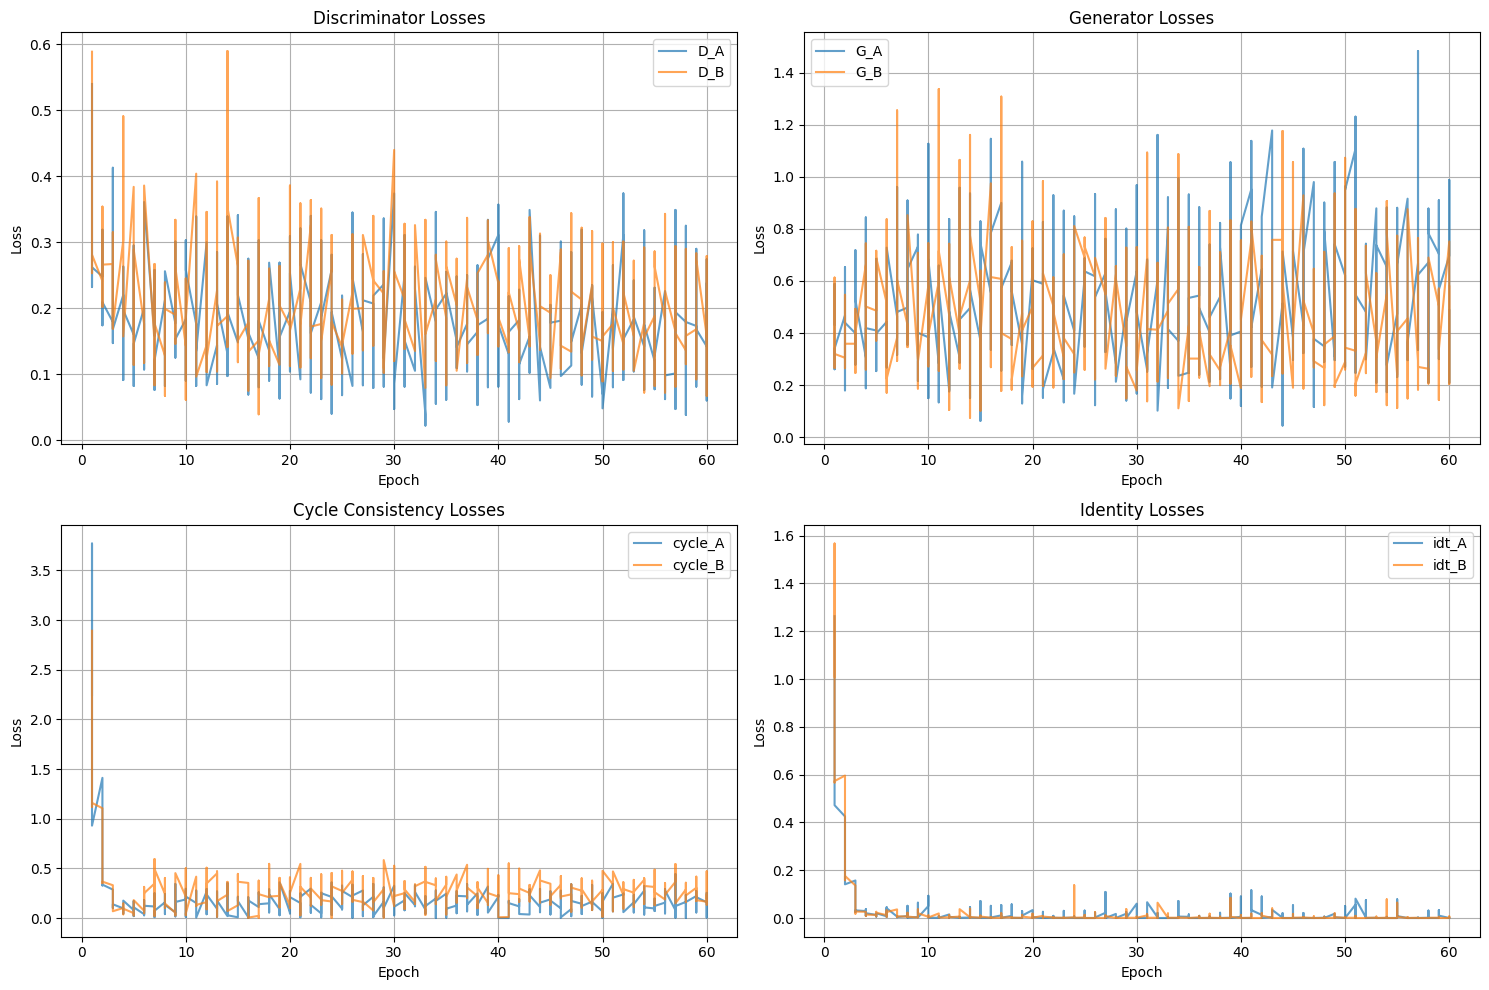

<Figure size 640x480 with 0 Axes>

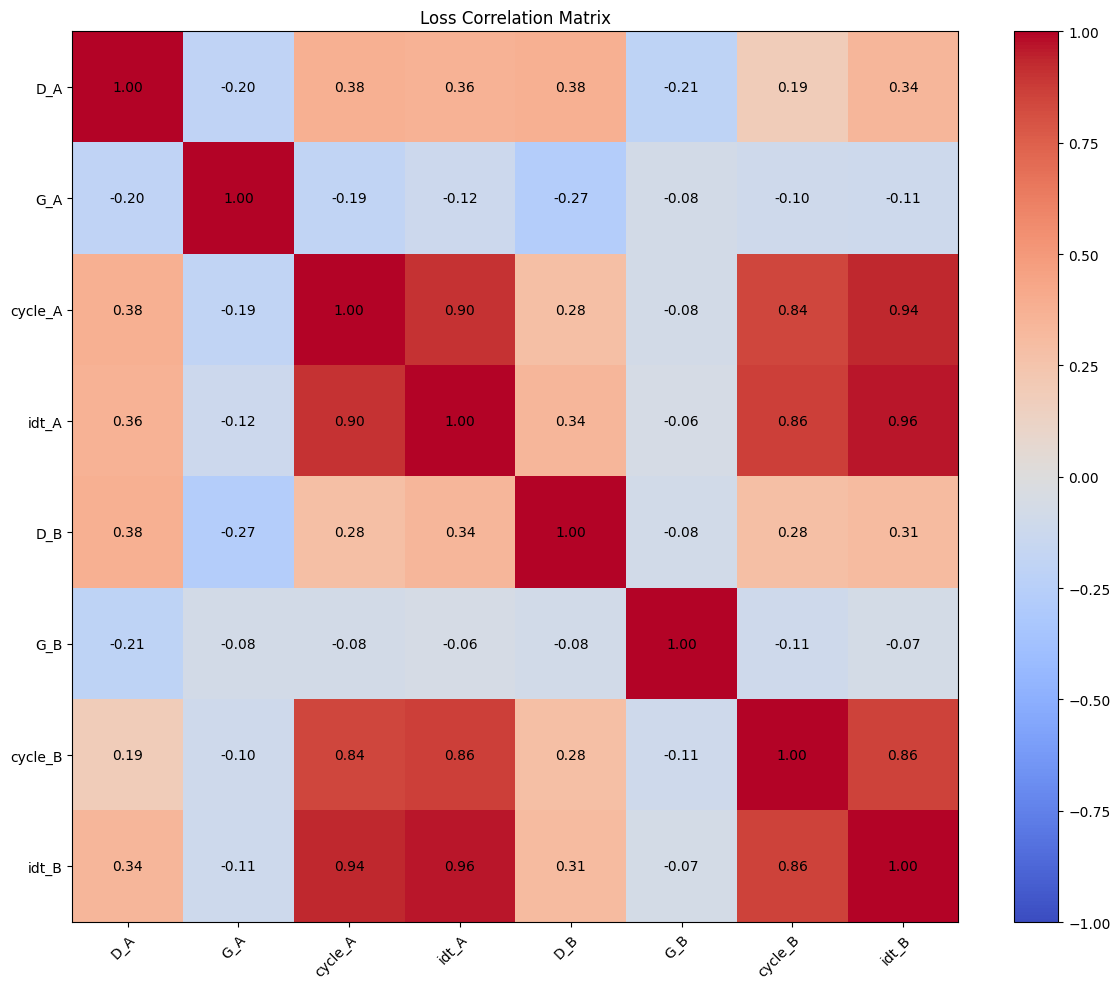

<Figure size 640x480 with 0 Axes>

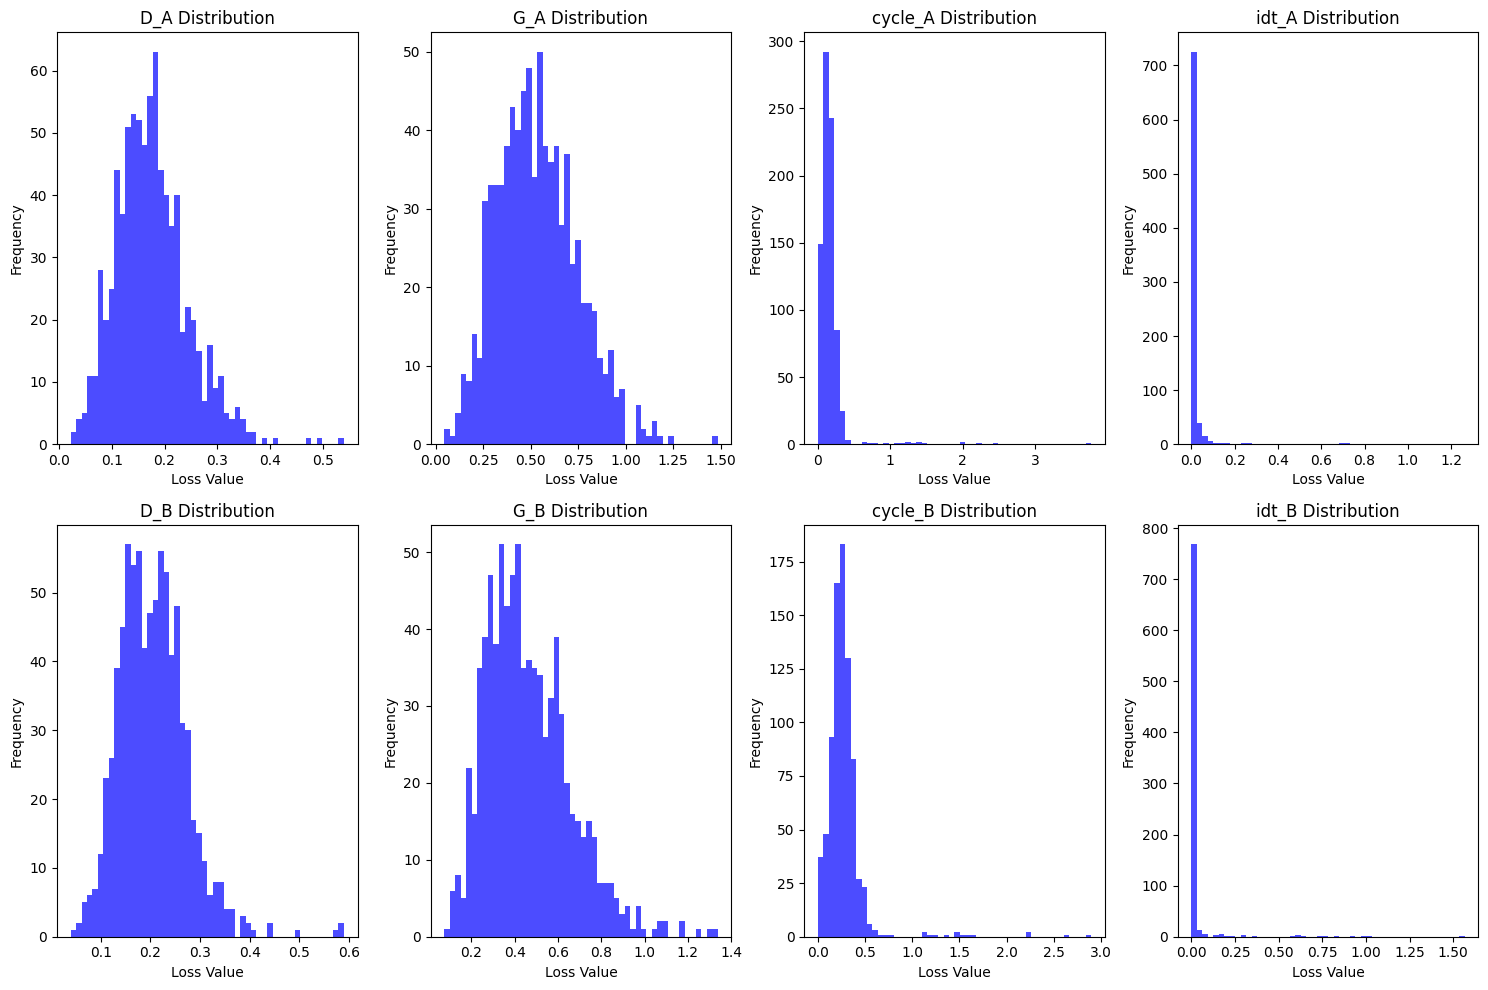


Summary Statistics:
                   D_A         G_A     cycle_A       idt_A         D_B  \
count       815.000000  815.000000  815.000000  815.000000  815.000000   
mean          0.175425    0.533508    0.175304    0.022168    0.205312   
std           0.067929    0.209280    0.238664    0.104603    0.067779   
min           0.022000    0.045000    0.001000    0.000000    0.039000   
25%           0.129000    0.380000    0.093000    0.000000    0.158000   
50%           0.170000    0.521000    0.143000    0.001000    0.202000   
75%           0.213000    0.670500    0.199000    0.005000    0.245000   
max           0.540000    1.483000    3.771000    1.263000    0.590000   
variance      0.004614    0.043798    0.056960    0.010942    0.004594   
median        0.170000    0.521000    0.143000    0.001000    0.202000   
final_mean    0.157815    0.526148    0.144889    0.000148    0.209222   
final_std     0.051248    0.192314    0.058493    0.000456    0.052325   

                

In [9]:
# Read and parse the loss log
df = parse_loss_log('loss_log.txt')

# Plot the training losses
plt.figure(1)
loss_plot = plot_training_losses(df)
plt.show()

# Create and display the correlation matrix
plt.figure(2)
correlation_plot = create_loss_matrix(df)
plt.show()

# Plot loss distributions
plt.figure(3)
dist_plot = plot_loss_distributions(df)
plt.show()

# Display summary statistics
summary_stats = display_summary_statistics(df)
print("\nSummary Statistics:")
print(summary_stats)

# Calculate and display convergence metrics
print("\nConvergence Analysis:")
print("Final loss values (last epoch):")
last_epoch = df['epoch'].max()
final_losses = df[df['epoch'] == last_epoch][['D_A', 'G_A', 'cycle_A', 'idt_A', 'D_B', 'G_B', 'cycle_B', 'idt_B']].mean()
print(final_losses)

# Calculate average loss per epoch
epoch_avg = df.groupby('epoch')[['D_A', 'G_A', 'cycle_A', 'idt_A', 'D_B', 'G_B', 'cycle_B', 'idt_B']].mean()
print("\nTraining Duration:")
print(f"Total epochs: {df['epoch'].max()}")
print(f"Total iterations: {len(df)}")
print(f"Average time per iteration: {df['time'].mean():.3f} seconds")

<Figure size 640x480 with 0 Axes>

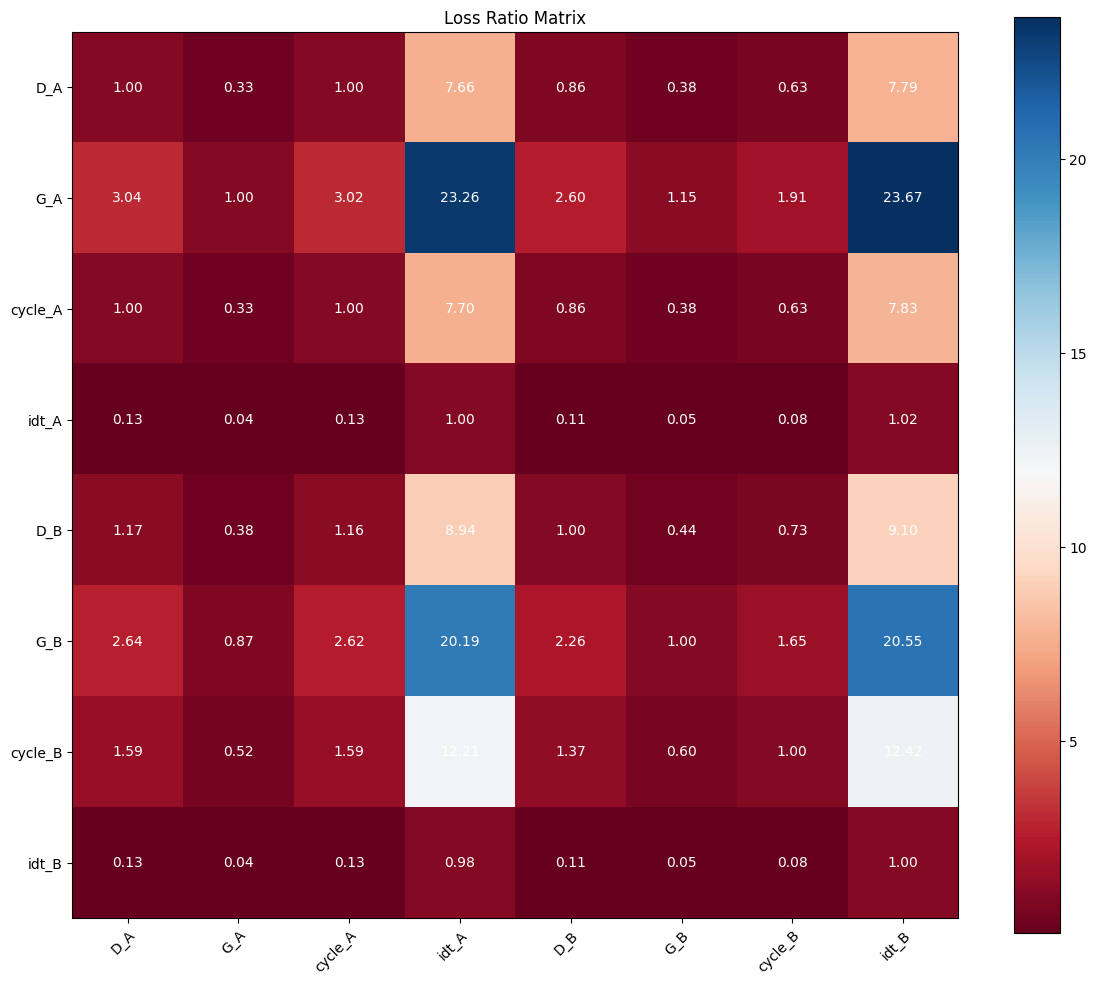

<Figure size 640x480 with 0 Axes>

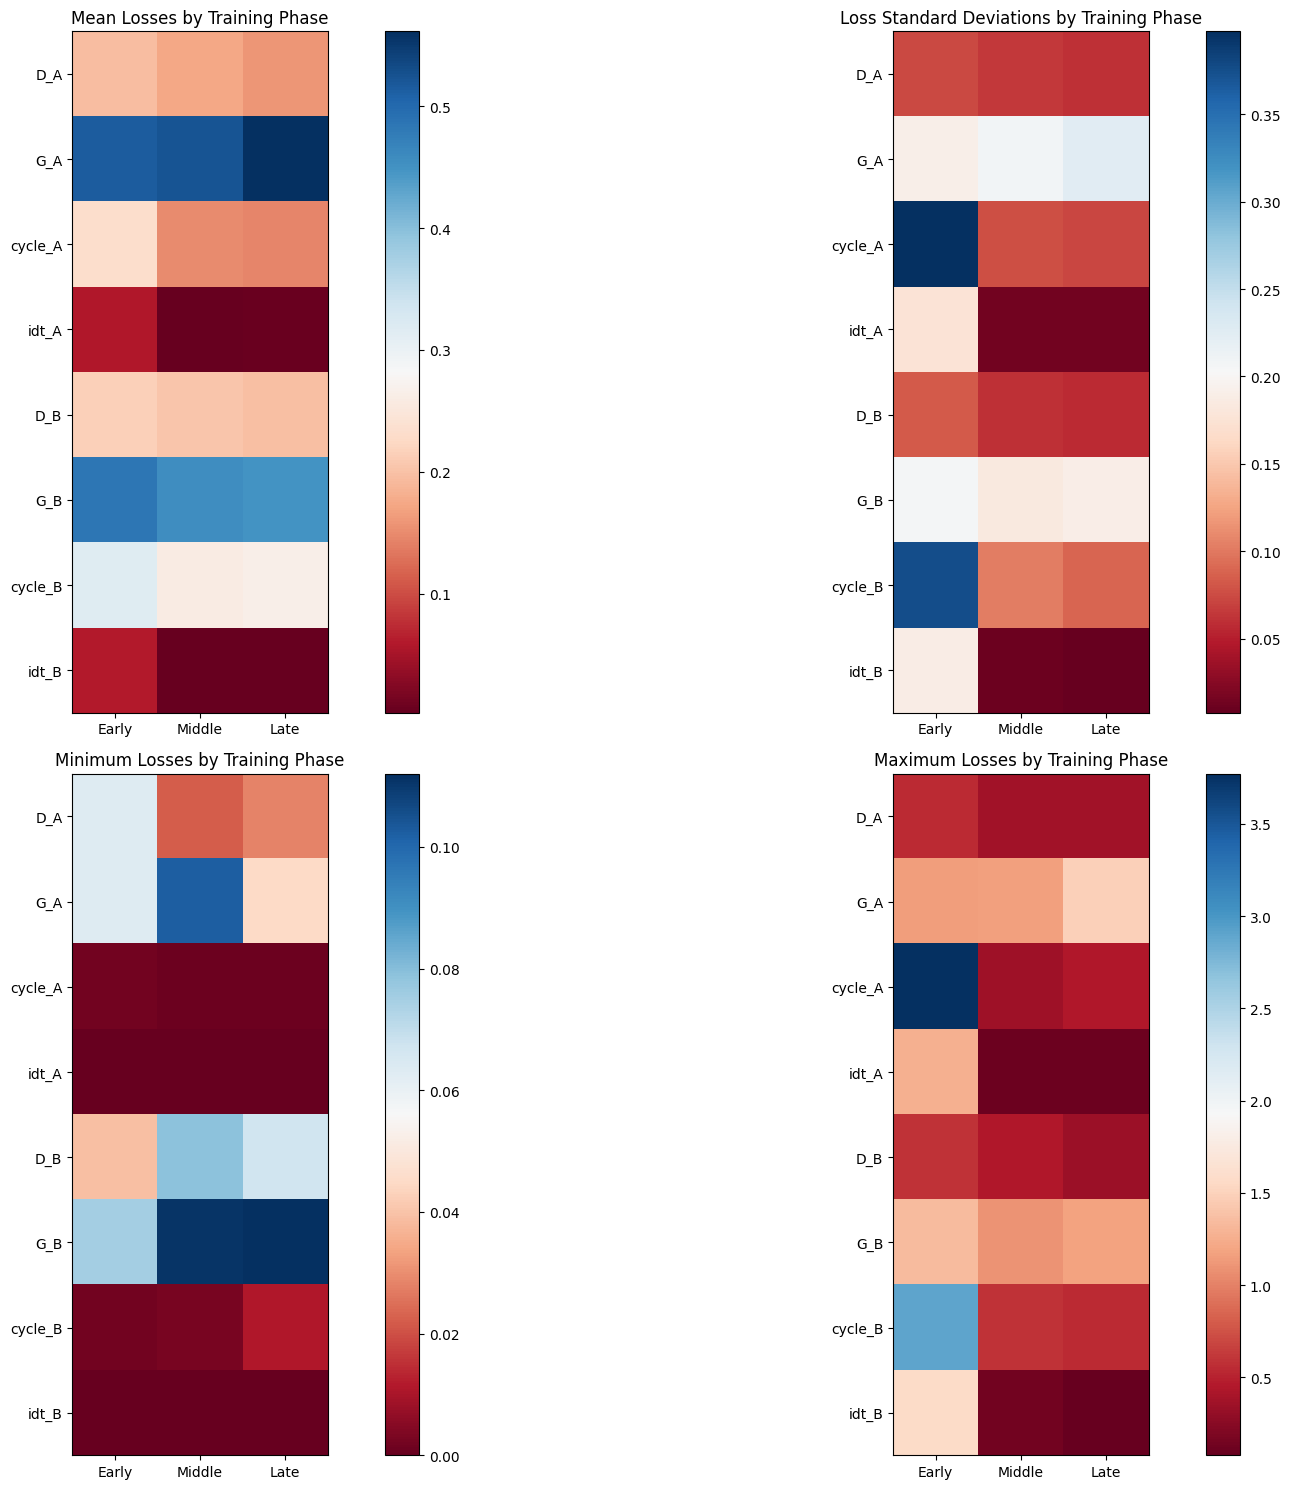

<Figure size 640x480 with 0 Axes>

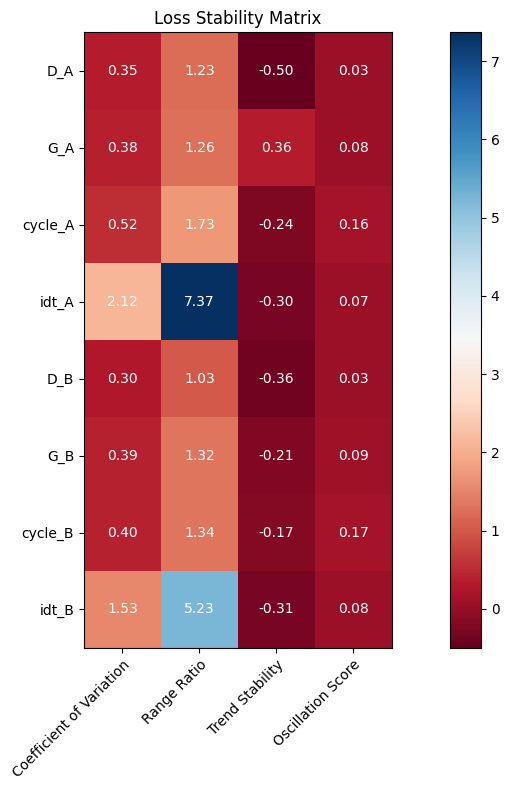


Loss Stability Analysis:

D_A Analysis:
Early phase mean: 0.1952
Late phase mean: 0.1592
Relative change: -18.4%

G_A Analysis:
Early phase mean: 0.5153
Late phase mean: 0.5615
Relative change: 9.0%

cycle_A Analysis:
Early phase mean: 0.2326
Late phase mean: 0.1443
Relative change: -38.0%

idt_A Analysis:
Early phase mean: 0.0586
Late phase mean: 0.0046
Relative change: -92.1%

D_B Analysis:
Early phase mean: 0.2151
Late phase mean: 0.1978
Relative change: -8.0%

G_B Analysis:
Early phase mean: 0.4844
Late phase mean: 0.4500
Relative change: -7.1%

cycle_B Analysis:
Early phase mean: 0.3160
Late phase mean: 0.2650
Relative change: -16.1%

idt_B Analysis:
Early phase mean: 0.0610
Late phase mean: 0.0021
Relative change: -96.5%


In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec

def create_custom_colormap():
    """Create a custom colormap for visualizations"""
    colors = ['#67001f', '#b2182b', '#d6604d', '#f4a582', '#fddbc7',
              '#f7f7f7', '#d1e5f0', '#92c5de', '#4393c3', '#2166ac', '#053061']
    return LinearSegmentedColormap.from_list('custom_diverging', colors)

def plot_loss_ratio_matrix(df):
    """
    Create a matrix showing the ratios between different losses over time
    """
    loss_columns = ['D_A', 'G_A', 'cycle_A', 'idt_A', 'D_B', 'G_B', 'cycle_B', 'idt_B']
    
    # Calculate mean values for each loss per epoch
    epoch_means = df.groupby('epoch')[loss_columns].mean()
    
    # Calculate ratios between losses
    ratio_matrix = np.zeros((len(loss_columns), len(loss_columns)))
    for i, loss1 in enumerate(loss_columns):
        for j, loss2 in enumerate(loss_columns):
            ratio_matrix[i, j] = epoch_means[loss1].mean() / epoch_means[loss2].mean()
    
    fig, ax = plt.subplots(figsize=(12, 10))
    im = ax.imshow(ratio_matrix, cmap=create_custom_colormap())
    
    # Add colorbar
    plt.colorbar(im)
    
    # Add labels
    ax.set_xticks(np.arange(len(loss_columns)))
    ax.set_yticks(np.arange(len(loss_columns)))
    ax.set_xticklabels(loss_columns)
    ax.set_yticklabels(loss_columns)
    
    # Rotate the tick labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # Add text annotations
    for i in range(len(loss_columns)):
        for j in range(len(loss_columns)):
            text = ax.text(j, i, f'{ratio_matrix[i, j]:.2f}',
                         ha="center", va="center", color="white")
    
    ax.set_title('Loss Ratio Matrix')
    plt.tight_layout()
    return plt.gcf()

def plot_epoch_phase_matrix(df):
    """
    Create a matrix showing loss behavior in different phases of training
    """
    loss_columns = ['D_A', 'G_A', 'cycle_A', 'idt_A', 'D_B', 'G_B', 'cycle_B', 'idt_B']
    
    # Split training into three phases
    max_epoch = df['epoch'].max()
    early_phase = df[df['epoch'] <= max_epoch/3]
    mid_phase = df[(df['epoch'] > max_epoch/3) & (df['epoch'] <= 2*max_epoch/3)]
    late_phase = df[df['epoch'] > 2*max_epoch/3]
    
    # Calculate statistics for each phase
    phases = ['Early', 'Middle', 'Late']
    phase_data = [early_phase, mid_phase, late_phase]
    
    # Create matrices for different statistics
    means = np.zeros((len(loss_columns), len(phases)))
    stds = np.zeros((len(loss_columns), len(phases)))
    mins = np.zeros((len(loss_columns), len(phases)))
    maxs = np.zeros((len(loss_columns), len(phases)))
    
    for i, phase in enumerate(phase_data):
        for j, loss in enumerate(loss_columns):
            means[j, i] = phase[loss].mean()
            stds[j, i] = phase[loss].std()
            mins[j, i] = phase[loss].min()
            maxs[j, i] = phase[loss].max()
    
    # Create visualization
    fig = plt.figure(figsize=(20, 15))
    gs = GridSpec(2, 2, figure=fig)
    
    # Plot means
    ax1 = fig.add_subplot(gs[0, 0])
    im1 = ax1.imshow(means, cmap=create_custom_colormap())
    plt.colorbar(im1, ax=ax1)
    ax1.set_title('Mean Losses by Training Phase')
    ax1.set_yticks(np.arange(len(loss_columns)))
    ax1.set_yticklabels(loss_columns)
    ax1.set_xticks(np.arange(len(phases)))
    ax1.set_xticklabels(phases)
    
    # Plot standard deviations
    ax2 = fig.add_subplot(gs[0, 1])
    im2 = ax2.imshow(stds, cmap=create_custom_colormap())
    plt.colorbar(im2, ax=ax2)
    ax2.set_title('Loss Standard Deviations by Training Phase')
    ax2.set_yticks(np.arange(len(loss_columns)))
    ax2.set_yticklabels(loss_columns)
    ax2.set_xticks(np.arange(len(phases)))
    ax2.set_xticklabels(phases)
    
    # Plot min values
    ax3 = fig.add_subplot(gs[1, 0])
    im3 = ax3.imshow(mins, cmap=create_custom_colormap())
    plt.colorbar(im3, ax=ax3)
    ax3.set_title('Minimum Losses by Training Phase')
    ax3.set_yticks(np.arange(len(loss_columns)))
    ax3.set_yticklabels(loss_columns)
    ax3.set_xticks(np.arange(len(phases)))
    ax3.set_xticklabels(phases)
    
    # Plot max values
    ax4 = fig.add_subplot(gs[1, 1])
    im4 = ax4.imshow(maxs, cmap=create_custom_colormap())
    plt.colorbar(im4, ax=ax4)
    ax4.set_title('Maximum Losses by Training Phase')
    ax4.set_yticks(np.arange(len(loss_columns)))
    ax4.set_yticklabels(loss_columns)
    ax4.set_xticks(np.arange(len(phases)))
    ax4.set_xticklabels(phases)
    
    plt.tight_layout()
    return plt.gcf()

def plot_loss_stability_matrix(df):
    """
    Create a matrix showing the stability of losses over time
    """
    loss_columns = ['D_A', 'G_A', 'cycle_A', 'idt_A', 'D_B', 'G_B', 'cycle_B', 'idt_B']
    metrics = ['Coefficient of Variation', 'Range Ratio', 'Trend Stability', 'Oscillation Score']
    
    # Initialize stability matrix
    stability_matrix = np.zeros((len(loss_columns), len(metrics)))
    
    # Calculate epoch-wise statistics
    epoch_means = df.groupby('epoch')[loss_columns].mean()
    epoch_stds = df.groupby('epoch')[loss_columns].std()
    epoch_maxs = df.groupby('epoch')[loss_columns].max()
    epoch_mins = df.groupby('epoch')[loss_columns].min()
    
    for i, loss in enumerate(loss_columns):
        # Coefficient of Variation
        stability_matrix[i, 0] = (epoch_stds[loss] / epoch_means[loss]).mean()
        
        # Range Ratio
        stability_matrix[i, 1] = ((epoch_maxs[loss] - epoch_mins[loss]) / epoch_means[loss]).mean()
        
        # Trend Stability
        stability_matrix[i, 2] = epoch_means[loss].corr(pd.Series(range(len(epoch_means))))
        
        # Oscillation Score
        stability_matrix[i, 3] = epoch_means[loss].diff().std()
    
    # Create visualization
    fig, ax = plt.subplots(figsize=(12, 8))
    im = ax.imshow(stability_matrix, cmap=create_custom_colormap())
    
    # Add colorbar
    plt.colorbar(im)
    
    # Add labels
    ax.set_xticks(np.arange(len(metrics)))
    ax.set_yticks(np.arange(len(loss_columns)))
    ax.set_xticklabels(metrics)
    ax.set_yticklabels(loss_columns)
    
    # Rotate the tick labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # Add text annotations
    for i in range(len(loss_columns)):
        for j in range(len(metrics)):
            text = ax.text(j, i, f'{stability_matrix[i, j]:.2f}',
                         ha="center", va="center", color="white")
    
    ax.set_title('Loss Stability Matrix')
    plt.tight_layout()
    return plt.gcf()

# Read and parse the loss log
df = parse_loss_log('loss_log.txt')

# Plot loss ratio matrix
plt.figure(1)
ratio_matrix = plot_loss_ratio_matrix(df)
plt.show()

# Plot epoch phase matrix
plt.figure(2)
phase_matrix = plot_epoch_phase_matrix(df)
plt.show()

# Plot loss stability matrix
plt.figure(3)
stability_matrix = plot_loss_stability_matrix(df)
plt.show()

# Print detailed analysis
print("\nLoss Stability Analysis:")
loss_columns = ['D_A', 'G_A', 'cycle_A', 'idt_A', 'D_B', 'G_B', 'cycle_B', 'idt_B']

# Calculate and display loss dynamics
for loss in loss_columns:
    early_mean = df[df['epoch'] <= df['epoch'].max()/3][loss].mean()
    late_mean = df[df['epoch'] > 2*df['epoch'].max()/3][loss].mean()
    change = (late_mean - early_mean) / early_mean * 100
    
    print(f"\n{loss} Analysis:")
    print(f"Early phase mean: {early_mean:.4f}")
    print(f"Late phase mean: {late_mean:.4f}")
    print(f"Relative change: {change:.1f}%")
